<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/309CourseWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import moudle

In [14]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

load data

In [15]:
path = './data/train'
img_list= []
label_list = []
for label in os.listdir(path):
  for file_name in os.listdir(os.path.join(path, label)):
    img = Image.open(os.path.join(path, label, file_name))
    img = img.resize(size=(32,32))
    img_list.append(np.array(img))
    label_list.append(label)

all classes

In [16]:
class_name = ['speed_limit_20', 'speed_limit_30', 'speed_limit_50', 
              'speed_limit_60', 'speed_limit_70', 'speed_limit_80', 
              'lift__speed_limit_80', 'speed_limit_100', 'speed_limit_120']

check shape

In [17]:
X_train = np.array(img_list, dtype=int)
Y_train = np.array(label_list, ndmin=1, dtype=int)
X_train.shape, Y_train.shape

((12399, 32, 32, 3), (12399,))

feature scale

In [18]:
X_train = X_train/255

show image

speed_limit_100


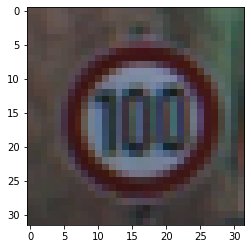

In [22]:
index = 12000
print(class_name[Y_train[index]])
plt.imshow(X_train[index])

create a simple model

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(9, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 100, validation_split=0.1)

Epoch 1/100
349/349 [==============================] - 3s 7ms/step - loss: 1.7125 - accuracy: 0.3713 - val_loss: 3.3695 - val_accuracy: 0.0000e+00
Epoch 2/100
349/349 [==============================] - 2s 6ms/step - loss: 1.4445 - accuracy: 0.5083 - val_loss: 3.4415 - val_accuracy: 0.0000e+00
Epoch 3/100
349/349 [==============================] - 2s 6ms/step - loss: 1.2272 - accuracy: 0.5907 - val_loss: 3.3498 - val_accuracy: 0.0000e+00
Epoch 4/100
349/349 [==============================] - 2s 6ms/step - loss: 1.0446 - accuracy: 0.6672 - val_loss: 3.0289 - val_accuracy: 0.0000e+00
Epoch 5/100
349/349 [==============================] - 3s 8ms/step - loss: 0.9363 - accuracy: 0.7053 - val_loss: 2.7477 - val_accuracy: 8.0645e-04
Epoch 6/100
349/349 [==============================] - 2s 6ms/step - loss: 0.8041 - accuracy: 0.7529 - val_loss: 2.8529 - val_accuracy: 0.0000e+00
Epoch 7/100
349/349 [==============================] - 2s 6ms/step - loss: 0.7316 - accuracy: 0.7799 - val_loss: 1.832

train error and val error

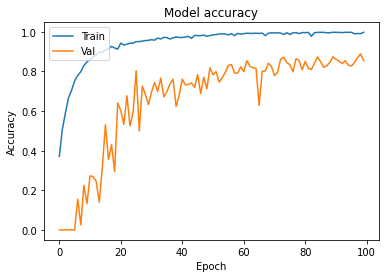

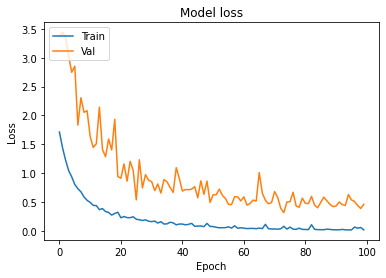

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()